<div align="left">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih (YY.AA)</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.0</td> 
    <td>18.07</td>
    <td>TR</td>
  </tr>
</table>
</div>

# Veri Biliminin Temelleri – Lojistik regresyon (Logistic Regression) nedir? 

Bu yazımızda **Lojistik Regresyon (Logistic Regression)** olarak tabir edilen algoritmayı masaya yatırıyoruz. Regresyon denildiğinde genellikle çıktı olarak sürekli (continuous) bir değişkenden söz edilir. Bu sizi yanıltmasın, Lojistik Regresyon'da çıktımız sürekli (continous) _değildir_. <br>

"Logistic Regression" ikili bir sınıflandırma problemini çözmeye yarayan bir sınıflandırıcıdır. Yani "yes" mi "no" mu sorusunun cevabını arıyorsak genellikle lojistik regresyon kullanırız.

![title](yes_no.jpg)

<div class="alert alert-info">
<b>Soru :</b> Lojistik ne demek? Bu isim nereden geliyor?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Lojistik kelimesi tahminleme (prediction) aşamasında kullanılan fonksiyonu ifade etmektedir. Ne demek istediğimizi biraz açıklamaya çalışalım <br>
Öyle bir fonksiyonumuz olsun ki çok büyük pozitif değerlerde "1" versin fakat çok küçük negatif değerlerde "0" versin. Bu fonksiyona 0 verdiğimiz zamanda çıktısı 0.5 olsun. <br> 
Bu tip problemler matematikçilerin yıllardır üzerine düşündüğü problemler olduğu için bu fonksiyonu bulması ve sorunun cevabını vermesi oldukça kolay. Aşağıdaki gibi bir fonksiyon oluşturursak istediğimiz özellikleri elde edebiliriz. <br><br>

\begin{equation*}
g(z)=\frac{1}{1+e^{-z}}
\end{equation*}
<br>
Bir de fonksiyonun çıktısına eşik seviyesi koyarsak oldukça güzel olacak: <br><br>
\begin{equation*}
y=1 \quad if \quad g(z) \geq 0.5 \quad(or\quad z \geq 0) \\
y=0 \quad if  \quad g(z) < 0.5 \quad(or\quad z < 0)
\end{equation*}
<br>
Şimdi bu fonksiyonu çizdirerek ve üzerinde biraz oynayarak bize ne anlatmak istediğini anlayalım. Kodlama zamanı!

</div>

In [1]:
%matplotlib notebook
# numerik numpy kütüphanesine ihtiyacımız olacak
import numpy as np
# çizim yapmak için matplotlib kütüphanesine ihtiyacımız var
import matplotlib.pyplot as plt
# bir de seaborn ateşleyelim güzel görünsün
import seaborn as sns
sns.set_style("darkgrid")


In [2]:
# şimdi fonksiyonumuzu yazabiliriz.
def log_func(x):
    # ilk denklem
    g_z = 1 / (1 + np.exp(-x))
    # ikinci denklem
    y = np.ones(g_z.shape)
    y[x>=0] = 1
    y[x<0] = 0
    # ikisini de döndürelim
    return (g_z,y)

<IPython.core.display.Javascript object>


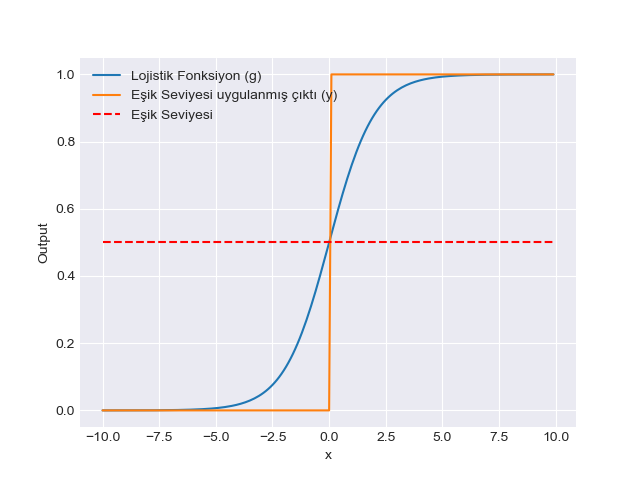

In [3]:
# Örnek bir veri yaratalım -10 +10 arası şimdilik bizim analizimiz için yeterli
x = np.arange(-10,10,0.1)
# Yukarıda hazırladığımız fonksiyonu çağıralım
g_z,y = log_func(x)
# Bir figür oluşturalım
plt.figure()
# Lojistik fonksiyonu çizdirelim
plt.plot(x,g_z)
# eşik seviyesi uygulanmış fonksiyonu çizdirelim
plt.plot(x,y)
# çizdirmişken eşik seviyesini çizdirelim tam olsun
plt.plot(x,np.ones(x.shape)*0.5,"--r")
# bir de legend
plt.legend(["Lojistik Fonksiyon (g)","Eşik Seviyesi uygulanmış çıktı (y)","Eşik Seviyesi"])
plt.xlabel("x")
plt.ylabel("Output");

<div class="alert alert-warning">
Yukarıdaki grafiğe baktığımızda ikili bir sınıflandırıcının temellerini görmekteyiz. Bu fonksiyon eksi sonsuzdan artı sonsuza kadar olan sayılar için yalnızca 0 ve 1 çıktısı üretebilmektedir.
</div>

--------------------------

<div class="alert alert-info">
<b>Soru :</b> Basit bir örnek yapsak da anlasak nasıl olur?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Tamamdır :) O zaman cevabı "yes" mi "no" mu olan bir soru arayalım ve görselleştirmesi kolay olsun diye iki boyutlu bir uzay üzerinde çalışalım. <br><br>

Daha iyi bir öneriniz yoksa meşhur Iris verisetini kullanacağım. İris veri seti 3 çiçekten oluşmaktadır bunlardan iki tanesini seçip bir sınıflandırma problemi hazırlayacağım. Bunu yaparken 4 boyutlu olan seti 2 boyuta düşüreceğim ki çizdirmesi kolay olsun. Başlayalım o halde !



</div>


In [4]:
# pandas yüklemek lazım!
import pandas as pd
# Scikit Learn
from sklearn import datasets
from sklearn.decomposition import PCA
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
# iris verisetini yukluyoruz
iris = datasets.load_iris()
# Bunu pandas haline cevirmek biraz zahmetli ama buna deger!
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# Pandas'ın kabiliyetlerini kullanarak bir ozet yapalım
iris_pd.describe()
print("Çiçek isimleri")
print(iris["target_names"])

Çiçek isimleri
['setosa' 'versicolor' 'virginica']


Bu örnek anlatılırken genelde bu çiçek neymiş diye gösteren olmaz. Bu büyük hizmetimizi de unutmayın, aşağıda bir resmini koyuyorum :)
![title](svv.jpg)
<div class="alert alert-warning">
Yukarıdaki tablodan gördüğümüz gibi 4 tane özniteliğimiz mevcut. Şimdi bunları 2 boyuta düşürürsek anlaması daha kolay olabilir. O zaman en temel boyut düşürme yöntemi olan PCA kullanalım.<br>PCA hakkında bilginiz yoksa endişelenmeyin bu bölümü geçebilirsiniz ve daha sonra sitemizden bununla ilgili makaleyi okuyabilirsiniz.
</div>

<IPython.core.display.Javascript object>


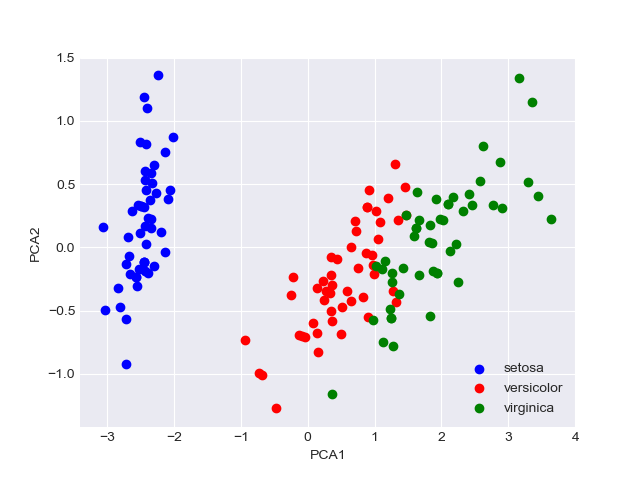

In [5]:
# Öznitelikleri hazırlayalım
X = iris_pd.iloc[:,0:3]
# Etiketleri hazırlayalım
y = iris_pd.iloc[:,4]
# İki boyuta indirelim
pca = PCA(n_components=2)
# pca uygulayalım
pca.fit(X,y)
X_pca = pca.fit_transform(X)

plt.figure()
# Haydi çizdirelim bunu
# Setosa için
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],c="b")
# Versicolor için
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],c='r')
# Virginica için
plt.scatter(X_pca[y==2,0],X_pca[y==2,1],c="g")

plt.legend(iris["target_names"])
plt.xlabel("PCA1");
plt.ylabel("PCA2");

<div class="alert alert-info">
<b>Soru :</b> Tamam boyutu düşürdük ama 3 sınıf var bu örnekte, Lojistik regresyon 2 sınıflıydı, yanlış mı hatırlıyorum?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Doğrudur, amacımız iki sınıflı bir sınıflandırıcıyı göstermek olduğu için Versicolor ve Virginica türlerini alalım şimdilik. Bu iki türü seçmemizin sebebi "linearly separable" olmayan bir problem için sınıflandırıcıyı gösterebilmek.

Not: "Linearly Sperable" adından anlaşılabileceği üzere iki sınıfın birbirinden bir doğru ile ayrışabilmesi demektir.
</div>


<IPython.core.display.Javascript object>


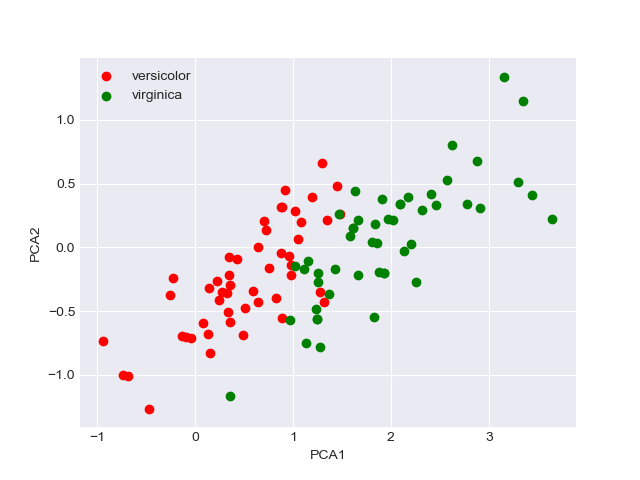

In [6]:
# Birinci ve ikinci sınıflar bulunuyor
X_binary = X_pca[(y==1) | (y==2),0:2]
y_binary = y[(y==1) | (y==2)]

plt.figure()
# Setosa için
plt.scatter(X_binary[y_binary==1,0],X_binary[y_binary==1,1],c="r")
# Versicolor için
plt.scatter(X_binary[y_binary==2,0],X_binary[y_binary==2,1],c='g')

# Legend önemli neyin ne olduğunu nasıl göreceğiz başka türlü
plt.legend(iris["target_names"][1:3])
plt.xlabel("PCA1");
plt.ylabel("PCA2");


<div class="alert alert-warning">
Nihayet sıra geldi Lojistik Regresyona! (Logistic Regression da diyebilirsiniz çok tuhafınıza gidiyorsa)
</div>

<IPython.core.display.Javascript object>


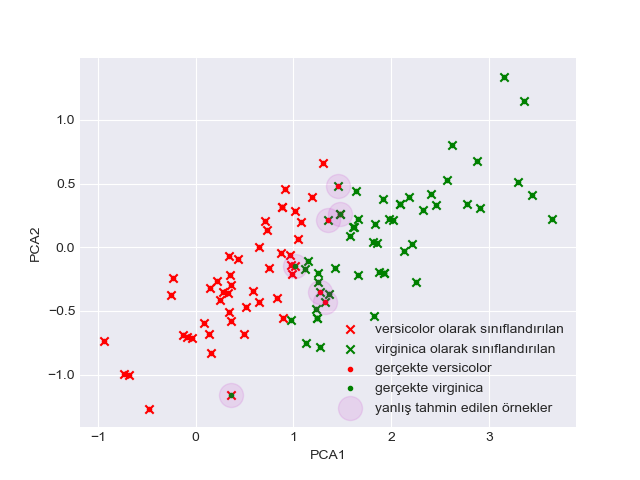

In [7]:
# Varsayılan parametreleri kullanarak bir sınıflandırıcı oluşturalım.
logreg = LogisticRegression()
logreg.fit(X_binary,y_binary)
y_pred = logreg.predict(X_binary)
# tahminleri kırmızı ve yeşil çarpı olarak çizdirelim
plt.figure()
# Setosa için
plt.scatter(X_binary[y_pred==1,0],X_binary[y_pred==1,1],c="r",marker="x")
# Versicolor için
plt.scatter(X_binary[y_pred==2,0],X_binary[y_pred==2,1],c='g',marker="x")

plt.scatter(X_binary[y_binary==1,0],X_binary[y_binary==1,1],c="r",marker=".")
plt.scatter(X_binary[y_binary==2,0],X_binary[y_binary==2,1],c='g',marker=".")

# Yanlış sınıflandırılanlarıu ayrıca gösterelim
plt.scatter(X_binary[~(y_binary==y_pred),0],X_binary[~(y_binary==y_pred),1],c="m",s=300,alpha=0.1)

plt.legend([iris["target_names"][1] + " olarak sınıflandırılan",iris["target_names"][2] + " olarak sınıflandırılan",
            "gerçekte " + iris["target_names"][1], "gerçekte " + iris["target_names"][2], "yanlış tahmin edilen örnekler"])
plt.xlabel("PCA1");
plt.ylabel("PCA2");

<div class="alert alert-warning">
Şimdi burada dikkat ederseniz yanlış sınıflandırılan örnekler var. Burada örnekler lineer bir şekilde ayrılamamakta bu sebeple yanlış sınıflandırılan örnekler mevcut. Son olarak bir de karar çizgisine bir bakalım bunun için  biraz kod yazmamız gerekecek.
</div>

--------------------

<div class="alert alert-info">
<b>Soru :</b> Peki bu karar sınırını (decision boundary) göstermenin bir yolu var mı?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Tabii ki var olmaz mı? Haydi birlikte deneyelim
</div>

<IPython.core.display.Javascript object>


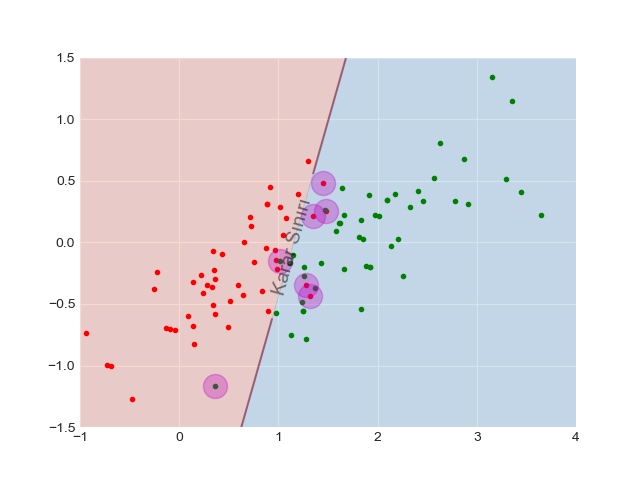

In [8]:
# ilk önce bir grid oluşturuyoruz
plt.figure()
ax= plt.gca()
x_min=-1
x_max=4
y_min=-1.5
y_max=1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict_proba(grid)[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, [0,0.5,1],cmap='RdBu', alpha=.3)
cs2 = ax.contour(xx, yy, Z, 0.5, cmap='RdBu', alpha=.5)
plt.clabel(cs2, fmt = 'Karar Sınırı', colors = 'k', fontsize=14)

plt.scatter(X_binary[y_binary==1,0],X_binary[y_binary==1,1],c="r",marker=".")
plt.scatter(X_binary[y_binary==2,0],X_binary[y_binary==2,1],c='g',marker=".")
# Yanlış sınıflandırılanlar
plt.scatter(X_binary[~(y_binary==y_pred),0],X_binary[~(y_binary==y_pred),1],c="m",s=300,alpha=0.3);

<div class="alert alert-warning">
Burada doğrusal bir ayrım görünüyor. Yanlış sınıflandırılan noktalar da magenta renginde çemberler ile işaretlenmiş durumdalar. Güzel görünüyor değil mi?
</div>

<div class="alert alert-info">
<b>Soru :</b> Yukarıda bahsedilen lojistik fonksiyonu hatırlaım birden. Bunun çıktılarını görselleştirmek mümkün mü?
</div>

<div class="alert alert-success">
<b>Cevap :</b> Evvet bu da mümkün! Bizde yok yok :) Lojistik fonksiyonu 0 ile 1 arasında bir değer çıkartabiliyor, neden bunu kullanmayalım ki! Görselleştirme yapan kod parçasında ufak bir değişiklik yaparsak bu işi kotarabiliriz.
</div>

<IPython.core.display.Javascript object>


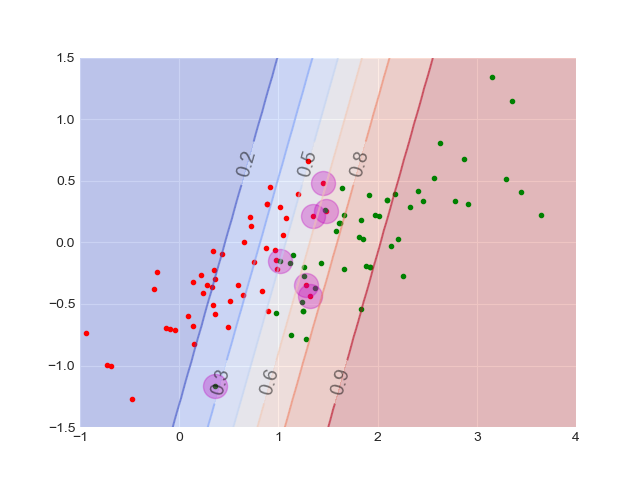

In [9]:
# ilk önce bir grid oluşturuyoruz
plt.figure()
ax= plt.gca()
x_min=-1
x_max=4
y_min=-1.5
y_max=1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict_proba(grid)[:, 1]
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=.3)
cs2 = ax.contour(xx, yy, Z, cmap='coolwarm', alpha=.5)
plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)

plt.scatter(X_binary[y_binary==1,0],X_binary[y_binary==1,1],c="r",marker=".")
plt.scatter(X_binary[y_binary==2,0],X_binary[y_binary==2,1],c='g',marker=".")
# Yanlış sınıflandırılanlar
plt.scatter(X_binary[~(y_binary==y_pred),0],X_binary[~(y_binary==y_pred),1],c="m",s=300,alpha=0.3);

<div class="alert alert-warning">
Ne hoş bir şekil daha! Bu da aslında bir önceki figür ile aynı. Aradaki tek fark eşik seviyelerinin görselleştirilmesi. 0.5 eşik seviyesini baz aldığımız zaman yukarıdaki şekil ile birebir aynı oluyor
<div/>